In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from stitcher import file_mods

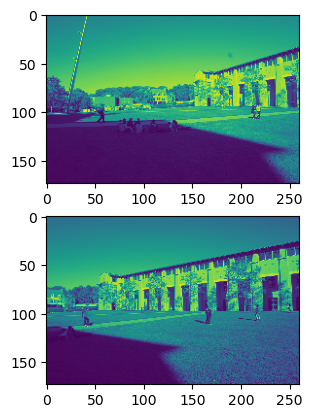

(173, 260)


In [2]:
img1 = cv.imread('./test-data/CMU0-1/modified/01.JPG', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('./test-data/CMU0-1/modified/02.JPG', cv.IMREAD_GRAYSCALE)
fig, axs = plt.subplots(2)
axs[0].imshow(img1)
axs[1].imshow(img2)
plt.show()

print(img1.shape)

In [3]:
N = 2
canvas = int(np.sqrt((img1.shape[0]*N)**2 + (img1.shape[1]*N)**2)) + 1
canvas = (canvas, canvas)

coords1, vals1 = file_mods.GenerateCoordsFromImage(img1)  # Preserve first image for placement
origin1 = (canvas[0]//2 - 173//2,0)
coords2, vals2 = file_mods.GenerateCoordsFromImage(img2)
origin2 = (canvas[0]//2 - 173//2, canvas[0]//4)
transformed2 = np.zeros(coords2.shape)

angle = np.deg2rad(10)
A = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
i=0
for coord in coords2:
    coord = coord.reshape((-1,1))
    coord = A @ coord
    transformed2[i,:] = coord.reshape(2)
    i+=1

In [4]:
layer1 = file_mods.DrawImageFromCoords(coords1, vals1, origin1, canvas)
layer1 = file_mods.interpolate(layer1)
layer2 = file_mods.DrawImageFromCoords(transformed2, vals2, origin2, canvas)
layer2 = file_mods.interpolate(layer2)

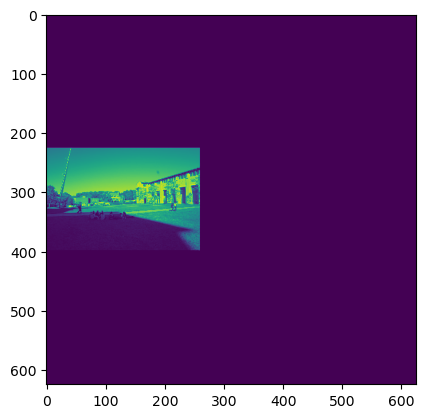

In [5]:
plt.imshow(layer1)
plt.show()

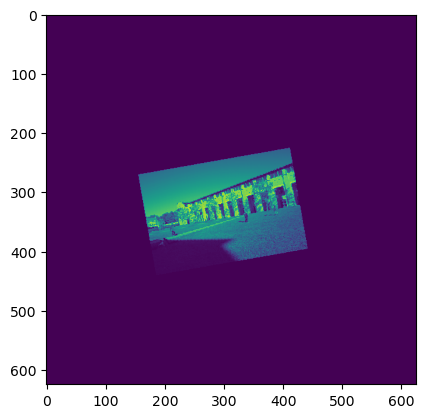

In [6]:
plt.imshow(layer2)
plt.show()

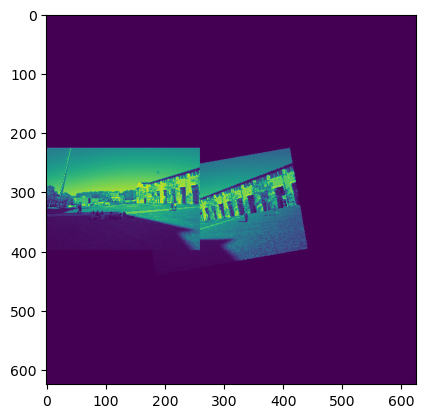

In [11]:
tmp = (layer1 == 0)*layer2
composite = layer1 + tmp
plt.imshow(composite)
plt.show()